Import necessary libraries :
Les bibliothèques nécessaires importées,
  numpy pour les opérations sur les tableaux,
  scikit-learn pour le traitement des données et l'évaluation,
   et tensorflow.keras pour la construction et l'entraînement du modèle ANN


In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score




Data  est chargé via load_iris(). Il contient des caractéristiques (longueur/largeur des pétales et sépales) et des cibles (espèces).

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Petal length, petal width, sepal length, sepal width
y = iris.target.reshape(-1, 1)  # Targets: Species



Les cibles (y) sont encodées en one-hot grâce à OneHotEncoder. Cela est indispensable pour la compatibilité avec la sortie softmax du réseau.

In [3]:
# One-hot encode the target labels
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()



Split data into train and  and test (0.8 and 0.2 test)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



standardisées Les caractéristiques  (StandardScaler) pour assurer une meilleure convergence pendant l'entraînement du réseau.


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



modèle séquentiel  avec 4 couches denses :
Trois couches cachées de 10 neurones utilisant l'activation ReLU.
Une couche de sortie avec 3 neurones  utilisant softmax pour produire des probabilités

In [6]:
# Build the ANN model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


modèle est compilé avec l'optimiseur Adam, une fonction de perte categorical_crossentropy (adaptée aux tâches de classification multiclasse) et l'accuracy comme métrique.
L'entraînement est effectué sur 1000 époques avec une taille de lot de 16. accuracy of 0.97.

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=0)



In [9]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.97


In [10]:

# Make predictions and calculate accuracy
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Accuracy on Test Set: 0.97


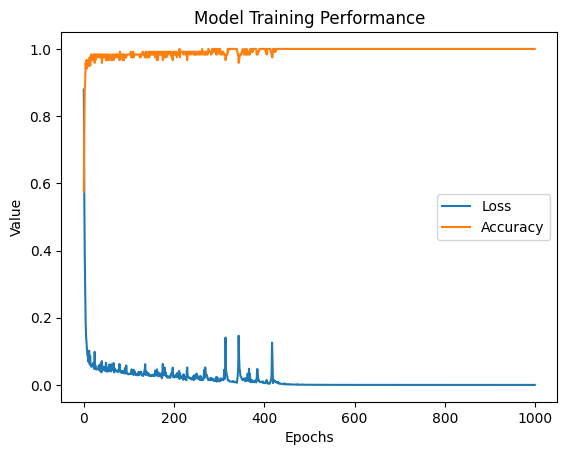

In [11]:
# Plot training performance
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()